In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
df = pd.read_csv('fireballs.csv')
df.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52


In [3]:
df.columns

Index(['Peak Brightness Date/Time (UT)', 'Latitude (deg.)', 'Longitude (deg.)',
       'Altitude (km)', 'Velocity (km/s)', 'vx', 'vy', 'vz',
       'Total Radiated Energy (J)', 'Calculated Total Impact Energy (kt)'],
      dtype='object')

In [4]:
ex = df.sort_values(by = 'Total Radiated Energy (J)', ascending = False).head()
ex[['Longitude (deg.)', 'Latitude (deg.)']].head(1)

,Longitude (deg.),Latitude (deg.)
146,61.1E,54.8N


In [5]:
df.sort_values(by = 'Velocity (km/s)', ascending = False).head(1)

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
67,2015-07-04 01:40:11,38.6N,103.1E,46.3,49.0,0.9,-40.4,-27.7,5.600000e+10,0.18


In [6]:
df.sort_values(by = 'Velocity (km/s)', ascending = True).head(1)

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
300,2008-07-01 17:40:19,37.1N,115.7W,36.1,9.8,2.8,1.7,-9.2,3.600000e+10,0.12


In [12]:
df.shape

(719, 10)

In [13]:
ex = df.dropna(subset = ['Velocity (km/s)'])
ex.shape

(157, 10)

In [15]:
df.rename(columns = {'Peak Brightness Date/Time (UT)': 'Peak'}, inplace=True)
df.head()

,Peak,Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52


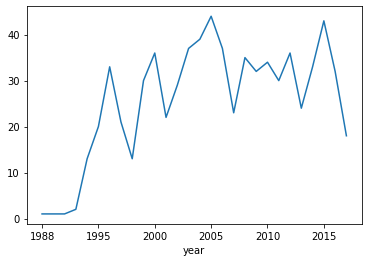

In [6]:
def get_data(Peak):
    return Peak.split('-')[0].strip()

year = df['Peak'].apply(get_data)
df['year'] = year
ex1 = df.groupby('year')['Peak'].count()
ex1.plot()

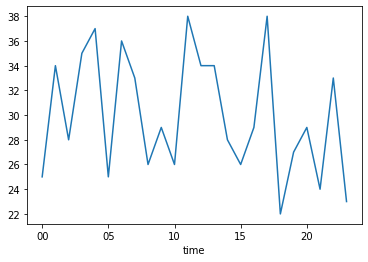

In [20]:
def get_data(Peak):
    return Peak.split(':')[0].strip()

def get_data1(time1):
    return time1.split(' ')[1].strip()

time1 = df['Peak'].apply(get_data)
df['time1'] = time1
time = df['time1'].apply(get_data1)
df['time'] = time
df.drop(['time1'], axis = 'columns', inplace = True)
ex2 = df.groupby('time')['Peak'].count()
ex2.plot()

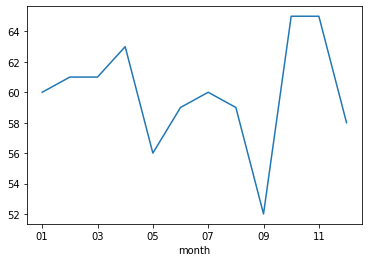

In [42]:
def get_data(Peak):
    return Peak.split('-')[1].strip()

month = df['Peak'].apply(get_data)
df['month'] = month
ex3 = df.groupby('month')['Peak'].count()
ex3.plot()

In [51]:
df['Velocity (km/s)'].tail()

714   NaN
715   NaN
716   NaN
717   NaN
718   NaN
Name: Velocity (km/s), dtype: float64

In [50]:
ex4 = df['Velocity (km/s)'].fillna(0)
ex4.tail()

714    0.0
715    0.0
716    0.0
717    0.0
718    0.0
Name: Velocity (km/s), dtype: float64

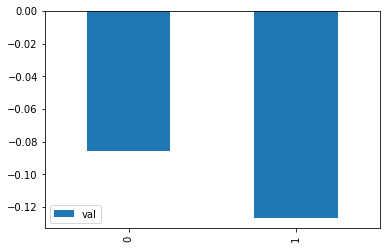

In [33]:
ex5 = df['Altitude (km)'].corr(df['Total Radiated Energy (J)'])
ex6 = df['Altitude (km)'].corr(df['Total Radiated Energy (J)'], method = 'spearman')
ms = pd.DataFrame({
    'col': ['pir', 'spr'],
    'val': [ex5, ex6]
})
ms.plot.bar()

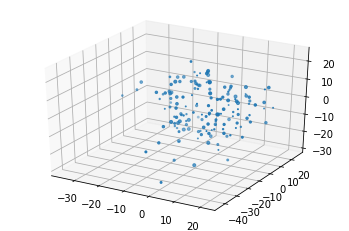

In [42]:
ex8 = df[['vx', 'vy', 'vz']]
x = np.array([ex8['vx']])
y = np.array([ex8['vy']])
z = np.array([ex8['vz']])
s = np.random.randint(1, 10, 20)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, s = s)

In [47]:
ix = df.dropna(subset = ['vx', 'vy', 'vz'])
ix1 = ix[['vx', 'vy', 'vz']]
ix1[(ix1.vx >= 0) &
    (ix1.vy >=0) &
    (ix1.vz >=0)].shape #(18, 3)
ix1[(ix1.vx >= 0) &
    (ix1.vy >=0) &
    (ix1.vz <=0)].shape #(12, 3)
ix1[(ix1.vx >= 0) &
    (ix1.vy <=0) &
    (ix1.vz >=0)].shape #(23, 3)
ix1[(ix1.vx >= 0) &
    (ix1.vy <=0) &
    (ix1.vz <=0)].shape #(26, 3)
ix1[(ix1.vx <= 0) &
    (ix1.vy <=0) &
    (ix1.vz <=0)].shape #(24, 3)
ix1[(ix1.vx <= 0) &
    (ix1.vy <=0) &
    (ix1.vz >=0)].shape #(18, 3)
ix1[(ix1.vx <= 0) &
    (ix1.vy >=0) &
    (ix1.vz >=0)].shape #(23, 3)
ix1[(ix1.vx <= 0) &
    (ix1.vy >=0) &
    (ix1.vz <=0)].shape #(13, 3)

(13, 10)